In [51]:
%pip install pandas matplotlib seaborn scikit-learn -q



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import tkinter as tk
from tkinter import messagebox


df = pd.read_csv('./mcdonalds.csv')

In [53]:
df.head()

,_id,active,name,code,country,timezone,address,city,neighborhood,cep,...,services.mcDelivery,services.timeExtended,services.mcParty,services.playPlace,services.parking,services.wifi,services.wheelchairAccess,services.dessertCenter,services.shoppingCenter,generalHour.daysOfWeek
0,61d7fcbda283bebac83e89c9,True,SOBRADINHO - SBR,SBR,BR,America/Sao_Paulo,"QD 06 - Área Reservada 3, s/n",Brasília,Sobradinho,73070035,...,False,True,False,False,True,True,True,False,False,"[{'day': 'mon', 'timePeriods': [{'start': '08:..."
1,62ed34bb7877dc2d6381ea1c,True,Drive Saída Norte - DSN,DSN,BR,America/Sao_Paulo,SPMN EPIA DF 03 Lote 02 Loja 01 Brasília - DF,Brasília,Lago Norte,71560100,...,True,True,False,False,False,False,True,False,False,"[{'day': 'mon', 'timePeriods': [{'start': '10:..."
2,62ed31417877dcd78481e3a7,True,Shopping Iguatemi - BSI,BSI,BR,America/Sao_Paulo,"SHIN CA 4 Lote A, lojas 177/178 – Shopping Igu...",Brasília,Lago Norte,71503504,...,False,False,False,False,False,False,True,True,True,"[{'day': 'mon', 'timePeriods': [{'start': '11:..."
3,62ed30849b780128a34229f8,True,Shopping Boulevard - BSB,BSB,BR,America/Sao_Paulo,"STN Terminal Norte, S/N, Conjunto J, Loja T51 ...",Brasília,Asa Norte,70770100,...,True,False,False,False,False,False,True,False,True,"[{'day': 'mon', 'timePeriods': [{'start': '10:..."
4,62ed2de97877dc4c1281d5ed,True,Asa Norte Eixinho - ASN,ASN,BR,America/Sao_Paulo,EQN 208/209 Bloco A – Lj. 50 – Asa Norte Bras...,Brasília,Asa Norte,70853400,...,True,True,False,False,False,False,True,False,False,"[{'day': 'mon', 'timePeriods': [{'start': '10:..."


In [54]:
df.describe()

,distance,coordinates.longitude,coordinates.latitude,coordinates.lng,coordinates.lat
count,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000
mean,1380.530839,-42.518490,-23.901153,-42.518490,-23.901153
std,1147.258006,9.610560,9.958499,9.610560,9.958499
min,34.005271,-63.876013,-56.114344,-63.876013,-56.114344
25%,898.639183,-47.068181,-23.694802,-47.068181,-23.694802
50%,920.855204,-46.546769,-23.480102,-46.546769,-23.480102
75%,1346.766388,-42.568615,-21.225657,-42.568615,-21.225657
max,11125.013013,46.701319,23.704880,46.701319,23.704880


In [55]:
df.shape

(2343, 39)

In [56]:
df = df.dropna()



In [57]:
rename_dict = {
    'id': 'Identificador',
    'active': 'Ativo',
    'name': 'Nome_do_lugar',
    'code': 'Codigo',
    'country': 'Pais',
    'timezone': 'Fuso_horario',
    'address': 'Endereco',
    'city': 'Cidade',
    'neighborhood': 'Bairro',
    'services.mcDelivery': 'Delivery',
    'services.timeExtended': 'Servicos_com_tempo_extimado',
    'services.mcParty': 'Mcfestas_de_servicos',
    'services.playPlace': 'Lugar_de_brincar',
    'services.parking': 'Serviços_de_estacionamento',
    'services.wifi': 'Wifi',
    'services.wheelchairAccesse': 'Acessibilidade',
    'services.dessertCenter': 'Centro_de_sobremesas',
    'services.shoppingCenter': 'Shopping_center',
    'generalHour.daysOfWeek': 'horas_dias_da_semana',
}

df = df.rename(columns=rename_dict)

In [58]:
df.head()

,_id,Ativo,Nome_do_lugar,Codigo,Pais,Fuso_horario,Endereco,Cidade,Bairro,cep,...,Delivery,Servicos_com_tempo_extimado,Mcfestas_de_servicos,Lugar_de_brincar,Serviços_de_estacionamento,Wifi,services.wheelchairAccess,Centro_de_sobremesas,Shopping_center,horas_dias_da_semana
0,61d7fcbda283bebac83e89c9,True,SOBRADINHO - SBR,SBR,BR,America/Sao_Paulo,"QD 06 - Área Reservada 3, s/n",Brasília,Sobradinho,73070035,...,False,True,False,False,True,True,True,False,False,"[{'day': 'mon', 'timePeriods': [{'start': '08:..."
1,62ed34bb7877dc2d6381ea1c,True,Drive Saída Norte - DSN,DSN,BR,America/Sao_Paulo,SPMN EPIA DF 03 Lote 02 Loja 01 Brasília - DF,Brasília,Lago Norte,71560100,...,True,True,False,False,False,False,True,False,False,"[{'day': 'mon', 'timePeriods': [{'start': '10:..."
2,62ed31417877dcd78481e3a7,True,Shopping Iguatemi - BSI,BSI,BR,America/Sao_Paulo,"SHIN CA 4 Lote A, lojas 177/178 – Shopping Igu...",Brasília,Lago Norte,71503504,...,False,False,False,False,False,False,True,True,True,"[{'day': 'mon', 'timePeriods': [{'start': '11:..."
3,62ed30849b780128a34229f8,True,Shopping Boulevard - BSB,BSB,BR,America/Sao_Paulo,"STN Terminal Norte, S/N, Conjunto J, Loja T51 ...",Brasília,Asa Norte,70770100,...,True,False,False,False,False,False,True,False,True,"[{'day': 'mon', 'timePeriods': [{'start': '10:..."
4,62ed2de97877dc4c1281d5ed,True,Asa Norte Eixinho - ASN,ASN,BR,America/Sao_Paulo,EQN 208/209 Bloco A – Lj. 50 – Asa Norte Bras...,Brasília,Asa Norte,70853400,...,True,True,False,False,False,False,True,False,False,"[{'day': 'mon', 'timePeriods': [{'start': '10:..."


In [59]:
df.shape

(1389, 39)

In [67]:
df = df[['Nome_do_lugar', 'Pais', 'Cidade', 'Bairro', 'Delivery', 'Servicos_com_tempo_extimado', 'Wifi']]


In [76]:
le = LabelEncoder()
df['Pais'] = le.fit_transform(df['Pais'])
df['Cidade'] = le.fit_transform(df['Cidade'])
df['Bairro'] = le.fit_transform(df['Bairro']) 


C:\Users\jesie\AppData\Local\Temp\ipykernel_10952\4169704003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pais'] = le.fit_transform(df['Pais'])
C:\Users\jesie\AppData\Local\Temp\ipykernel_10952\4169704003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cidade'] = le.fit_transform(df['Cidade'])
C:\Users\jesie\AppData\Local\Temp\ipykernel_10952\4169704003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [78]:
df['Pontuacao'] = df.apply(lambda row: row['Delivery'] + row['Servicos_com_tempo_extimado'] + row['Wifi'], axis=1)



In [82]:
df['Pontuacao'] = df['Pontuacao'] / df['Pontuacao'].max()



In [83]:
X = df.drop(['Pontuacao', 'Nome_do_lugar'], axis=1)
y = df['Pontuacao']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [84]:
acuracias = []
for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    acuracias.append(rmse)



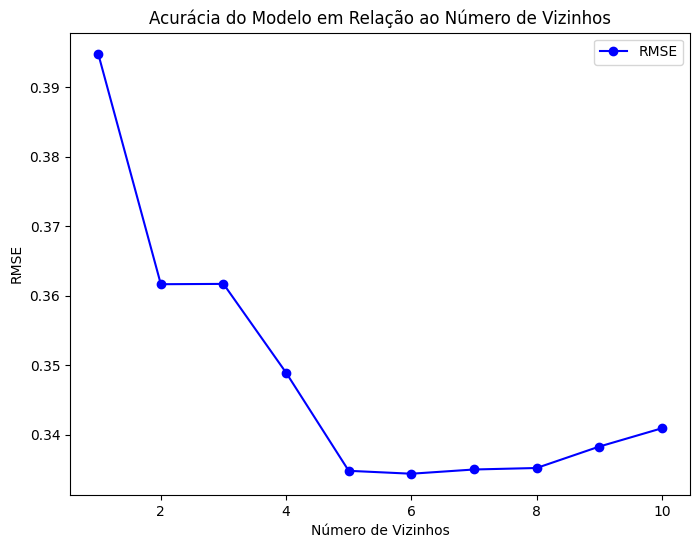

In [85]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), acuracias, marker='o', linestyle='-', color='b', label='RMSE')
plt.title('Acurácia do Modelo em Relação ao Número de Vizinhos')
plt.xlabel('Número de Vizinhos')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [86]:
n_vizinhos_otimo = acuracias.index(min(acuracias)) + 1


In [87]:
modelo = KNeighborsRegressor(n_neighbors=n_vizinhos_otimo)
modelo.fit(X_train, y_train)


,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [88]:
y_pred = modelo.predict(X_test)


In [89]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"RMSE: {rmse}")



RMSE: 0.33439744883608286
